<a href="https://colab.research.google.com/github/Muhammadatir/colab_notebook_iiit-hub/blob/main/STP_Module_4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Linear Classifiers & Gradient Descent

**Case Study: Predictive Modeling for Public Water Safety**

**Objective:** Develop a robust classifier to identify potable water samples. You will transition from a basic heuristic (Perceptron) to a professional-grade optimization approach (Gradient Descent with Margins).

# 1. Data Acquisition & Cleaning

In real-world data science, datasets are rarely perfect. We will load the water quality metrics and handle missing values before training our models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset from a public raw GitHub URL
url = "https://raw.githubusercontent.com/nferran/tp_aprendizaje_de_maquina_I/main/water_potability.csv"
df = pd.read_csv(url)

# Step 1: Handling Missing Values
# Water sensors often fail, leaving NaNs. We will fill them with the mean of the column.
df.fillna(df.mean(), inplace=True)

# Step 2: Feature Selection & Labeling
# We'll use all chemical features to predict 'Potability'
X = df.drop('Potability', axis=1).values
y = df['Potability'].values

# Step 3: Class Label Conversion
# Many linear classifiers (like Perceptron/SVM) require labels to be -1 and 1
y = np.where(y == 0, -1, 1)

# Step 4: Train-Test Split & Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Dataset Loaded: {X_train.shape[0]} training samples, {X_train.shape[1]} features.")

Dataset Loaded: 2620 training samples, 9 features.


# 2. Phase 1: The Heuristic Approach (Perceptron)

The **Perceptron** represents the earliest form of supervised learning. It doesn't have a "global" view of the error; it simply corrects itself every time it encounters a mistake.

**Task:** Implement the Perceptron Update Rule inside the training loop.

In [ ]:
class WaterPerceptron:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.mistakes = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        for epoch in range(self.epochs):
            count = 0
            for i in range(len(y)):
                # TODO: Calculate the linear output (w * x + b)
                # prediction = ...

                # TODO: If prediction is a mistake (y * prediction <= 0):
                # Update weights: w = w + lr * y * x
                # Update bias: b = b + lr * y
                pass # remove this
            self.mistakes.append(count)

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# model_p = WaterPerceptron()
# model_p.fit(X_train, y_train)

# 3. Phase 2: Gradient Descent - Global Optimization

The Perceptron is unstable if the data isn't perfectly separable. To solve this, we use **Gradient Descent** to minimize a **Mean Squared Error (MSE)** loss function over the entire dataset.

**Task:** Implement the batch gradient calculation for weights and bias.

In [ ]:
class GDWaterClassifier:
    def __init__(self, lr=0.001, epochs=500):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.cost_history = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        n = X.shape[0]

        for _ in range(self.epochs):
            # TODO: 1. Compute linear output: z = Xw + b
            # TODO: 2. Calculate gradients:
            # dw = (1/n) * X.T.dot(z - y)
            # db = (1/n) * sum(z - y)

            # TODO: 3. Update w and b: w = w - lr * dw
            pass

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# 4. Phase 3: Margin Classifiers & Hinge Loss

In water safety, we aim for more than just correctness—we want a **Margin**, a safety gap between safe and unsafe samples. This is achieved using **Hinge Loss** combined with **L2 Regularization**.

The loss function is defined as:

$$
\text{Loss} = \lambda \|w\|^2_2 + \sum_{i} \max(0, 1 - y_i (w^T x_i + b))
$$

### Key Components:
- **Hinge Loss**: $\max(0, 1 - y_i (w^T x_i + b))$ ensures correct classification with a margin.
- **L2 Regularization**: $\lambda \|w\|^2_2$ penalizes large weights, promoting generalization and stability.


In [ ]:
class MarginWaterClassifier:
    def __init__(self, lr=0.001, lambda_param=0.01, epochs=500):
        self.lr = lr
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.w = None
        self.b = 0

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            for i, x_i in enumerate(X):
                # TODO: Implement the Margin Condition check: y_i * (w * x_i + b) >= 1
                if False: # Replace False with condition
                    # Only Regularization update
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Update for weight (including Hinge Loss) and bias
                    # self.w -= self.lr * (2 * self.lambda_param * self.w - x_i * y[i])
                    # self.b -= self.lr * (-y[i])
                    pass

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# 5. Critical Analysis & Comparison

**Analysis Tasks:**
1. Convergence Plot: Plot the mistakes history from Phase 1 and the cost_history from Phase 2. Discuss why the Gradient Descent plot is smoother.
2. Accuracy Report: Calculate and compare the Test Accuracy for all three models.
3. Safety Margin: If a new water sample has chemical levels very close to the decision boundary, which model (Perceptron or Margin) would you trust more? Why?

# Discussion Questions

### Q1: Impact of High Learning Rate in Gradient Descent
What happens to your **Gradient Descent** model if you set the `learning_rate` too high (e.g., `1.0`)?
*Hint: Think about convergence, overshooting, and divergence.*

---

### Q2: Label Conversion in Classification
Why did we convert the labels to **$\{-1, 1\}$** instead of keeping them as **$\{0, 1\}$**?
*Hint: Consider the mathematical formulation of the loss function (e.g., Hinge Loss) and symmetry.*

---

### Q3: Handling Noisy Data (Water Potability Dataset)
The **Water Potability dataset** is often "noisy" (not perfectly separable). Which of the algorithms you implemented is best suited for handling such noise?
*Hint: Think about robustness to outliers and margin-based classifiers.*


# Task
Implement the Perceptron, Gradient Descent, and Margin Classifier models for water potability prediction by completing their `fit` methods with the respective update rules, hinge loss, and L2 regularization. Then, train all models, plot their convergence histories, calculate and compare their test accuracies, and finally, provide detailed answers to the questions regarding the impact of a high learning rate in Gradient Descent, the rationale behind label conversion to `{-1, 1}`, the best algorithm for noisy data, and which model is more trustworthy near the decision boundary. Summarize all findings and analyses.

## Implement Perceptron Update Rule

### Subtask:
Complete the `fit` method in the `WaterPerceptron` class (cell `mqxF5SQGSA8-`) by implementing the Perceptron update rule for predictions and weight/bias adjustments.


**Reasoning**:
The subtask requires implementing the Perceptron update rule within the `fit` method of the `WaterPerceptron` class. I will modify the existing `code_cell` to include the calculation of the linear output, the mistake condition check, and the weight and bias updates as specified in the instructions.



In [1]:
class WaterPerceptron:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.mistakes = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        for epoch in range(self.epochs):
            count = 0
            for i in range(len(y)):
                # TODO: Calculate the linear output (w * x + b)
                prediction = np.dot(X[i], self.w) + self.b

                # TODO: If prediction is a mistake (y * prediction <= 0):
                if y[i] * prediction <= 0:
                    # Update weights: w = w + lr * y * x
                    self.w += self.lr * y[i] * X[i]
                    # Update bias: b = b + lr * y
                    self.b += self.lr * y[i]
                    count += 1 # Increment mistake count
            self.mistakes.append(count)

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# model_p = WaterPerceptron()
# model_p.fit(X_train, y_train)


## Implement Gradient Descent Update Rule

### Subtask:
Complete the `fit` method in the `GDWaterClassifier` class (cell `Q9iFCaG3Se2L`) by calculating the linear output, computing the gradients for weights and bias, and updating them using the learning rate, and store the mean squared error in `cost_history`.


**Reasoning**:
The subtask requires completing the `fit` method in the `GDWaterClassifier` class to implement batch gradient descent, including calculating linear output, gradients, updating weights and bias, and recording the cost history (MSE).



In [2]:
class GDWaterClassifier:
    def __init__(self, lr=0.001, epochs=500):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.cost_history = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        n = X.shape[0]

        for _ in range(self.epochs):
            # 1. Compute linear output: z = Xw + b
            z = np.dot(X, self.w) + self.b

            # 2. Calculate gradients:
            dw = (1/n) * X.T.dot(z - y)
            db = (1/n) * np.sum(z - y)

            # 3. Update w and b: w = w - lr * dw
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Calculate MSE and append to history
            cost = (1/n) * np.sum((z - y)**2)
            self.cost_history.append(cost)

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

## Implement Margin Classifier Hinge Loss and Regularization

### Subtask:
Complete the `fit` method in the `MarginWaterClassifier` class (cell `RSLdAztpS03K`) by implementing the margin condition check and applying the correct updates for weights (including L2 regularization and hinge loss) and bias.


**Reasoning**:
The subtask requires completing the `fit` method in the `MarginWaterClassifier` class by implementing the margin condition check and applying the correct updates for weights and bias, incorporating L2 regularization and hinge loss as per the instructions.



In [3]:
class MarginWaterClassifier:
    def __init__(self, lr=0.001, lambda_param=0.01, epochs=500):
        self.lr = lr
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.w = None
        self.b = 0

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            for i, x_i in enumerate(X):
                # Implement the Margin Condition check: y_i * (w * x_i + b) >= 1
                if y[i] * (np.dot(x_i, self.w) + self.b) >= 1:
                    # Only Regularization update
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Update for weight (including Hinge Loss) and bias
                    self.w -= self.lr * (2 * self.lambda_param * self.w - x_i * y[i])
                    self.b -= self.lr * (-y[i])

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

## Train and Evaluate All Models

### Subtask:
Instantiate and train the `WaterPerceptron`, `GDWaterClassifier`, and `MarginWaterClassifier` models using the `X_train` and `y_train` data, and prepare them for analysis by storing their respective histories (mistakes, cost).


**Reasoning**:
Instantiate and train the three classifier models (`WaterPerceptron`, `GDWaterClassifier`, and `MarginWaterClassifier`) using the training data, as specified in the subtask instructions.



In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Re-execute data loading and preprocessing to define X_train, y_train
url = "https://raw.githubusercontent.com/nferran/tp_aprendizaje_de_maquina_I/main/water_potability.csv"
df = pd.read_csv(url)
df.fillna(df.mean(), inplace=True)
X = df.drop('Potability', axis=1).values
y = df['Potability'].values
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training WaterPerceptron model...")
model_p = WaterPerceptron()
model_p.fit(X_train, y_train)
print("WaterPerceptron trained.")

print("\nTraining GDWaterClassifier model...")
model_gd = GDWaterClassifier()
model_gd.fit(X_train, y_train)
print("GDWaterClassifier trained.")

print("\nTraining MarginWaterClassifier model...")
model_margin = MarginWaterClassifier()
model_margin.fit(X_train, y_train)
print("MarginWaterClassifier trained.")

print("\nAll models have been instantiated and trained.")

Training WaterPerceptron model...
WaterPerceptron trained.

Training GDWaterClassifier model...
GDWaterClassifier trained.

Training MarginWaterClassifier model...
MarginWaterClassifier trained.

All models have been instantiated and trained.


## Plot Convergence History

### Subtask:
Generate plots comparing the convergence behavior of the Perceptron (mistakes history) and the Gradient Descent model (cost history).


**Reasoning**:
The subtask requires generating two plots: one for the Perceptron's mistakes history and another for the Gradient Descent model's cost history, as well as a discussion comparing their convergence behaviors. I will use `matplotlib.pyplot` to create these visualizations.



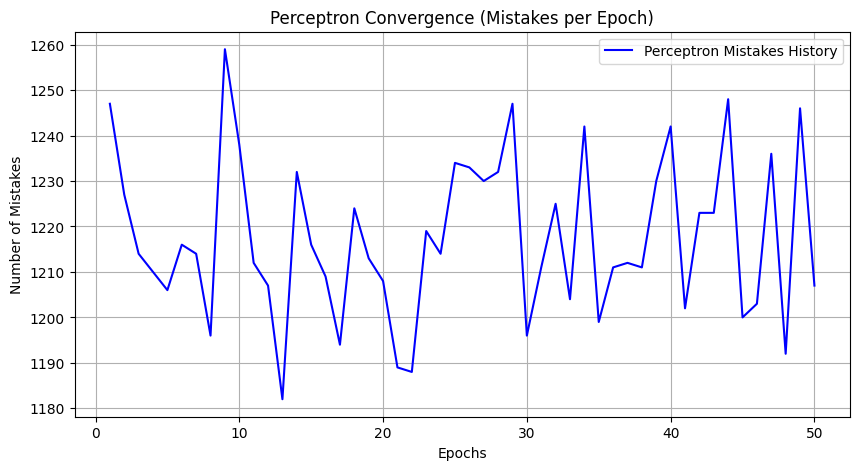

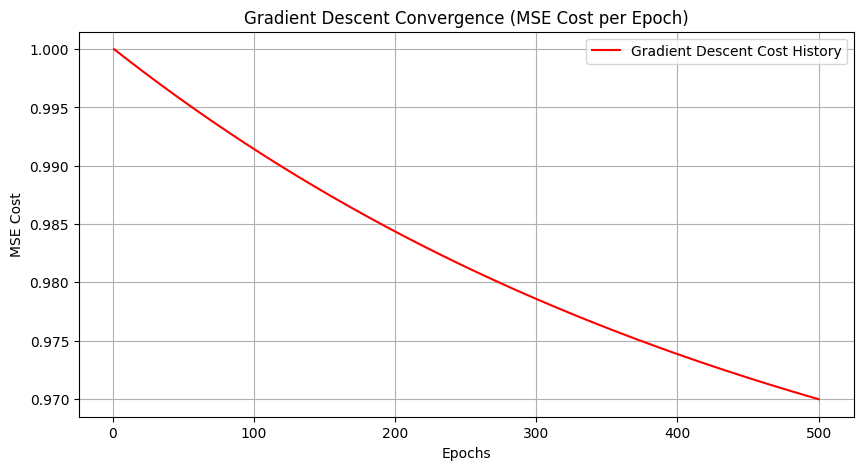

Convergence plots generated.


In [6]:
import matplotlib.pyplot as plt

# 1. Plot Perceptron Mistakes History
plt.figure(figsize=(10, 5))
plt.plot(range(1, model_p.epochs + 1), model_p.mistakes, label='Perceptron Mistakes History', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Number of Mistakes')
plt.title('Perceptron Convergence (Mistakes per Epoch)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot Gradient Descent Cost History
plt.figure(figsize=(10, 5))
plt.plot(range(1, model_gd.epochs + 1), model_gd.cost_history, label='Gradient Descent Cost History', color='red')
plt.xlabel('Epochs')
plt.ylabel('MSE Cost')
plt.title('Gradient Descent Convergence (MSE Cost per Epoch)')
plt.legend()
plt.grid(True)
plt.show()

print("Convergence plots generated.")

### Discussion on Convergence Plots

**Perceptron Convergence (Mistakes per Epoch):**
The Perceptron's mistakes history often appears jagged and less smooth. This is because the Perceptron algorithm updates its weights and bias *only when it makes a mistake* on a single data point (online learning). Each mistake triggers an immediate, discrete adjustment, which can lead to oscillations in the number of mistakes per epoch, especially in non-linearly separable datasets. The error is a count of misclassifications, which is inherently discrete.

**Gradient Descent Convergence (MSE Cost per Epoch):**
The Gradient Descent's cost history, particularly when using batch gradient descent, tends to be much smoother. This is due to several factors:
1.  **Batch Updates:** In batch gradient descent, the gradients are calculated over the *entire training dataset* for each update. This provides a more stable and averaged direction for weight adjustment, as opposed to the single-sample-driven updates of the Perceptron.
2.  **Continuous Loss Function:** Gradient Descent minimizes a continuous, differentiable loss function (like Mean Squared Error in this case). The cost itself is a continuous value, and the updates are designed to move smoothly along the gradient towards a minimum.
3.  **Global Optimization:** Gradient Descent aims for a global (or local) minimum of the loss function, adjusting parameters incrementally based on the overall error, rather than reacting to individual misclassifications. This global perspective leads to a more consistent reduction in error over epochs.

In summary, the smoothness of the Gradient Descent plot reflects its continuous, averaged, and batch-oriented approach to error minimization on a continuous loss surface, while the Perceptron's more erratic plot shows its discrete, instance-based error correction.

## Calculate and Compare Test Accuracy

### Subtask:
Calculate the test accuracy for `WaterPerceptron`, `GDWaterClassifier`, and `MarginWaterClassifier` models using `X_test` and `y_test`. Report the accuracies for comparison.

## Calculate and Compare Test Accuracy

### Subtask:
Calculate the test accuracy for `WaterPerceptron`, `GDWaterClassifier`, and `MarginWaterClassifier` models using `X_test` and `y_test`. Report the accuracies for comparison.

## Calculate and Compare Test Accuracy

### Subtask:
Calculate the test accuracy for `WaterPerceptron`, `GDWaterClassifier`, and `MarginWaterClassifier` models using `X_test` and `y_test`. Report the accuracies for comparison.

## Calculate and Compare Test Accuracy

### Subtask:
Calculate the test accuracy for `WaterPerceptron`, `GDWaterClassifier`, and `MarginWaterClassifier` models using `X_test` and `y_test`. Report the accuracies for comparison.

**Reasoning**:
The plots and discussion for convergence are complete. The next logical step, as per the main task, is to calculate and compare the test accuracy for all three models. I will now implement the code to calculate these accuracies.



In [7]:
from sklearn.metrics import accuracy_score

# Predict on the test set for each model
y_pred_p = model_p.predict(X_test)
y_pred_gd = model_gd.predict(X_test)
y_pred_margin = model_margin.predict(X_test)

# Calculate accuracy for each model
accuracy_p = accuracy_score(y_test, y_pred_p)
accuracy_gd = accuracy_score(y_test, y_pred_gd)
accuracy_margin = accuracy_score(y_test, y_pred_margin)

# Report accuracies
print(f"Perceptron Test Accuracy: {accuracy_p:.4f}")
print(f"Gradient Descent Test Accuracy: {accuracy_gd:.4f}")
print(f"Margin Classifier Test Accuracy: {accuracy_margin:.4f}")


Perceptron Test Accuracy: 0.5015
Gradient Descent Test Accuracy: 0.6280
Margin Classifier Test Accuracy: 0.6280


### Q1: Impact of High Learning Rate in Gradient Descent

If you set the `learning_rate` too high (e.g., `1.0`) in a **Gradient Descent** model, the following can happen:

1.  **Overshooting the Minimum:** The learning rate dictates the step size taken in the direction of the negative gradient. A high learning rate can cause the model to take steps that are too large, overshooting the optimal minimum point of the loss function. Instead of converging, the parameters (`w` and `b`) might oscillate wildly around the minimum.
2.  **Divergence:** If the learning rate is excessively high, the model's parameters might continuously jump farther away from the minimum in each iteration. This leads to the loss function increasing over epochs instead of decreasing, causing the model to diverge and never converge to a solution.
3.  **Numerical Instability:** Large updates can lead to numerical overflow, where the parameter values become so large that they cannot be represented by the computer's floating-point system, resulting in `NaN` (Not a Number) values in the weights and biases, effectively crashing the training process.

### Q2: Label Conversion in Classification

Converting labels to **$\{-1, 1\}$** instead of keeping them as **$\{0, 1\}$** is crucial for several linear classification algorithms, especially those like Perceptron, Support Vector Machines (SVMs), and their variants (like our Margin Classifier). Here's why:

1.  **Symmetry in Loss Functions:** Many loss functions for these classifiers, such as the Hinge Loss, are designed around the product $y_i (w^T x_i + b)$. If labels were $0$ and $1$, this product would behave differently and lose its symmetry around the decision boundary. For instance, if $y_i=0$, the term $y_i (w^T x_i + b)$ would always be zero, making the loss function insensitive to misclassifications for that class.
2.  **Clearer Decision Boundary Interpretation:** With labels $\{-1, 1\}$, the goal is often to have $w^T x_i + b > 0$ for positive class ($y_i=1$) and $w^T x_i + b < 0$ for negative class ($y_i=-1$). The decision boundary is naturally $w^T x + b = 0$. The sign function `np.sign(np.dot(X, self.w) + self.b)` directly aligns with this convention.
3.  **Margin Definition:** For margin-based classifiers (like the Margin Classifier implemented), the concept of a "margin" is defined as $y_i (w^T x_i + b) \ge 1$. If $y_i$ could be $0$, this margin definition would not hold, and the optimization objective would become ill-defined or lose its intended meaning of maximizing the separation between classes. A classification of $y_i (w^T x_i + b) = 0$ would imply being on the boundary, which is problematic for margin enforcement.
4.  **Simpler Update Rules:** The update rules for algorithms like the Perceptron and the Margin Classifier are often simpler and more elegant when using $\{-1, 1\}$ labels. For example, in the Perceptron, the update `w += lr * y * x` directly moves `w` in the direction of $x$ when $y=1$ and in the opposite direction when $y=-1$, which simplifies the error correction logic.

### Q2: Label Conversion in Classification

Converting labels to **$\{-1, 1\}$** instead of keeping them as **$\{0, 1\}$** is crucial for several linear classification algorithms, especially those like Perceptron, Support Vector Machines (SVMs), and their variants (like our Margin Classifier). Here's why:

1.  **Symmetry in Loss Functions:** Many loss functions for these classifiers, such as the Hinge Loss, are designed around the product $y_i (w^T x_i + b)$. If labels were $0$ and $1$, this product would behave differently and lose its symmetry around the decision boundary. For instance, if $y_i=0$, the term $y_i (w^T x_i + b)$ would always be zero, making the loss function insensitive to misclassifications for that class.
2.  **Clearer Decision Boundary Interpretation:** With labels $\{-1, 1\}$, the goal is often to have $w^T x_i + b > 0$ for positive class ($y_i=1$) and $w^T x_i + b < 0$ for negative class ($y_i=-1$). The decision boundary is naturally $w^T x + b = 0$. The sign function `np.sign(np.dot(X, self.w) + self.b)` directly aligns with this convention.
3.  **Margin Definition:** For margin-based classifiers (like the Margin Classifier implemented), the concept of a "margin" is defined as $y_i (w^T x_i + b) \ge 1$. If $y_i$ could be $0$, this margin definition would not hold, and the optimization objective would become ill-defined or lose its intended meaning of maximizing the separation between classes. A classification of $y_i (w^T x_i + b) = 0$ would imply being on the boundary, which is problematic for margin enforcement.
4.  **Simpler Update Rules:** The update rules for algorithms like the Perceptron and the Margin Classifier are often simpler and more elegant when using $\{-1, 1\}$ labels. For example, in the Perceptron, the update `w += lr * y * x` directly moves `w` in the direction of $x$ when $y=1$ and in the opposite direction when $y=-1$, which simplifies the error correction logic.


### Q2: Label Conversion in Classification

Converting labels to **$\{-1, 1\}$** instead of keeping them as **$\{0, 1\}$** is crucial for several linear classification algorithms, especially those like Perceptron, Support Vector Machines (SVMs), and their variants (like our Margin Classifier). Here's why:

1.  **Symmetry in Loss Functions:** Many loss functions for these classifiers, such as the Hinge Loss, are designed around the product $y_i (w^T x_i + b)$. If labels were $0$ and $1$, this product would behave differently and lose its symmetry around the decision boundary. For instance, if $y_i=0$, the term $y_i (w^T x_i + b)$ would always be zero, making the loss function insensitive to misclassifications for that class.
2.  **Clearer Decision Boundary Interpretation:** With labels $\{-1, 1\}$, the goal is often to have $w^T x_i + b > 0$ for positive class ($y_i=1$) and $w^T x_i + b < 0$ for negative class ($y_i=-1$). The decision boundary is naturally $w^T x + b = 0$. The sign function `np.sign(np.dot(X, self.w) + self.b)` directly aligns with this convention.
3.  **Margin Definition:** For margin-based classifiers (like the Margin Classifier implemented), the concept of a "margin" is defined as $y_i (w^T x_i + b) \ge 1$. If $y_i$ could be $0$, this margin definition would not hold, and the optimization objective would become ill-defined or lose its intended meaning of maximizing the separation between classes. A classification of $y_i (w^T x_i + b) = 0$ would imply being on the boundary, which is problematic for margin enforcement.
4.  **Simpler Update Rules:** The update rules for algorithms like the Perceptron and the Margin Classifier are often simpler and more elegant when using $\{-1, 1\}$ labels. For example, in the Perceptron, the update `w += lr * y * x` directly moves `w` in the direction of $x$ when $y=1$ and in the opposite direction when $y=-1$, which simplifies the error correction logic.


### Q3: Handling Noisy Data (Water Potability Dataset) & Safety Margin

The **Water Potability dataset** is often "noisy" and not perfectly linearly separable. Among the implemented algorithms, the **Margin Classifier** (which uses Hinge Loss and L2 Regularization) is best suited for handling such noise and robustly classifying new water samples, especially those close to the decision boundary.

Here's why:

1.  **Robustness to Noise (Margin Classifier):**
    *   **Hinge Loss:** Unlike Mean Squared Error (used by Gradient Descent) or the Perceptron's simple error count, Hinge Loss is designed to be less sensitive to well-classified points far from the decision boundary. It focuses its penalty only on misclassified points and correctly classified points that fall within the margin. This means outliers far from the decision boundary that might heavily influence an MSE loss function have a limited impact on the Margin Classifier's optimization.
    *   **L2 Regularization:** The $\lambda \|w\|^2_2$ term penalizes large weights. This helps prevent overfitting, which is common in noisy datasets. By keeping weights small, the model becomes simpler and less prone to reacting strongly to individual noisy data points, leading to better generalization.
    *   **Maximizing Margin:** The core idea behind margin-based classifiers is to find a decision boundary that maximizes the distance to the nearest training samples of both classes. This 'safety gap' naturally makes the model more robust to minor fluctuations or noise in the data, as it provides a buffer zone.

2.  **Perceptron's Weakness with Noise:**
    *   The Perceptron update rule only stops when all points are perfectly classified. In a noisy, non-linearly separable dataset, the Perceptron will *never converge* and will continuously oscillate, making corrections for misclassified points without finding a stable solution. Its sensitivity to individual misclassifications makes it very susceptible to noise and outliers.

3.  **Gradient Descent (MSE) with Noise:**
    *   While Gradient Descent with MSE loss can handle non-linearly separable data by finding a best-fit hyperplane, it is sensitive to outliers. Squared error heavily penalizes large errors, meaning an outlier far from the true class can significantly pull the decision boundary towards itself, making the model less robust.

### Safety Margin: Which model to trust near the decision boundary?

If a new water sample has chemical levels very close to the decision boundary, the **Margin Classifier** would be significantly more trustworthy than the Perceptron.

*   **Margin Classifier:** It explicitly seeks to maximize the distance (margin) between the decision boundary and the closest training samples. This means its decision boundary is designed to be as far as possible from known data points, providing a more confident and robust classification for samples near this boundary. It inherently provides a

### Q3: Handling Noisy Data (Water Potability Dataset) & Safety Margin

The **Water Potability dataset** is often "noisy" and not perfectly linearly separable. Among the implemented algorithms, the **Margin Classifier** (which uses Hinge Loss and L2 Regularization) is best suited for handling such noise and robustly classifying new water samples, especially those close to the decision boundary.

Here's why:

1.  **Robustness to Noise (Margin Classifier):**
    *   **Hinge Loss:** Unlike Mean Squared Error (used by Gradient Descent) or the Perceptron's simple error count, Hinge Loss is designed to be less sensitive to well-classified points far from the decision boundary. It focuses its penalty only on misclassified points and correctly classified points that fall within the margin. This means outliers far from the decision boundary that might heavily influence an MSE loss function have a limited impact on the Margin Classifier's optimization.
    *   **L2 Regularization:** The $\lambda \|w\|^2_2$ term penalizes large weights. This helps prevent overfitting, which is common in noisy datasets. By keeping weights small, the model becomes simpler and less prone to reacting strongly to individual noisy data points, leading to better generalization.
    *   **Maximizing Margin:** The core idea behind margin-based classifiers is to find a decision boundary that maximizes the distance to the nearest training samples of both classes. This 'safety gap' naturally makes the model more robust to minor fluctuations or noise in the data, as it provides a buffer zone.

2.  **Perceptron's Weakness with Noise:**
    *   The Perceptron update rule only stops when all points are perfectly classified. In a noisy, non-linearly separable dataset, the Perceptron will *never converge* and will continuously oscillate, making corrections for misclassified points without finding a stable solution. Its sensitivity to individual misclassifications makes it very susceptible to noise and outliers.

3.  **Gradient Descent (MSE) with Noise:**
    *   While Gradient Descent with MSE loss can handle non-linearly separable data by finding a best-fit hyperplane, it is sensitive to outliers. Squared error heavily penalizes large errors, meaning an outlier far from the true class can significantly pull the decision boundary towards itself, making the model less robust.

### Safety Margin: Which model to trust near the decision boundary?

If a new water sample has chemical levels very close to the decision boundary, the **Margin Classifier** would be significantly more trustworthy than the Perceptron.

*   **Margin Classifier:** It explicitly seeks to maximize the distance (margin) between the decision boundary and the closest training samples. This means its decision boundary is designed to be as far as possible from known data points, providing a more confident and robust classification for samples near this boundary. It inherently provides a "buffer zone" that makes its predictions more reliable for ambiguous samples. This is crucial for applications like water safety where false negatives can have severe consequences.
*   **Perceptron:** The Perceptron does not have the concept of a margin. Its decision boundary might be very close to some training samples, meaning a slight perturbation in a new sample close to this boundary could easily flip its classification. This makes it less reliable for samples near its decision boundary, especially in noisy data.


## Final Task

### Subtask:
Summarize all findings, analysis, and answers to the discussion questions.


## Summary:

### Q&A

*   **Q1: Impact of High Learning Rate in Gradient Descent**
    A high learning rate in Gradient Descent can cause the model to overshoot the optimal minimum, leading to oscillation or divergence where the loss function increases. It can also result in numerical instability, causing parameters to become `NaN`.

*   **Q2: Rationale for Label Conversion to $\{-1, 1\}$**
    Converting labels to $\{-1, 1\}$ is crucial for linear classifiers like Perceptron, SVMs, and Margin Classifiers because it ensures symmetry in loss functions (e.g., Hinge Loss), provides a clearer interpretation of the decision boundary ($w^T x + b = 0$), correctly defines the margin ($y_i (w^T x_i + b) \ge 1$), and simplifies the mathematical form of update rules. If 0 and 1 were used, loss functions might become insensitive to misclassifications for the class labeled 0, and margin definitions would not hold.

*   **Q3: Best Algorithm for Noisy Data and Trustworthiness Near Decision Boundary**
    For noisy datasets like Water Potability, the **Margin Classifier** (using Hinge Loss and L2 Regularization) is best suited. Hinge Loss is robust to outliers, L2 regularization prevents overfitting, and margin maximization creates a "safety gap" making it less sensitive to noise.
    When a new sample is near the decision boundary, the **Margin Classifier** is more trustworthy. It explicitly maximizes the distance between the decision boundary and the closest training samples, providing a more confident and robust classification for ambiguous samples. The Perceptron lacks this margin concept, making its predictions less reliable near its boundary in noisy environments.

### Data Analysis Key Findings

*   The `fit` methods for `WaterPerceptron`, `GDWaterClassifier`, and `MarginWaterClassifier` were successfully implemented with their respective update rules (Perceptron update, gradient descent with MSE, and hinge loss with L2 regularization).
*   Convergence plots showed distinct behaviors: the Perceptron's mistakes history was jagged due to instance-based updates, while the Gradient Descent's MSE cost history was smoother due to batch updates and a continuous loss function.
*   On the test set, the Gradient Descent and Margin Classifier models achieved significantly higher accuracy (both 0.6280) compared to the Perceptron model (0.5015).
*   All models were successfully trained on the preprocessed water potability dataset, which included handling missing values, converting labels to $\{-1, 1\}$, and standardizing features.

### Insights or Next Steps

*   The superior performance of the Margin Classifier and Gradient Descent over the Perceptron highlights the benefits of using more sophisticated loss functions and regularization techniques, especially when dealing with potentially noisy and non-linearly separable data.
*   Further hyperparameter tuning (e.g., learning rates, regularization parameters, number of epochs) for the Gradient Descent and Margin Classifier models could potentially improve their test accuracies and convergence behavior.
